# Students Health and Academic Performance

#### **By looking through the dataset, we have learned much about how student mobile phone use affects performance predictors and academic success. Examining how students view the impact of mobile phones on their academics, including distractions and usage patterns, can yield a more thorough understanding of how these devices affect attention span and daily routines. These findings can aid in the creation of strategies that promote healthier smartphone use among students and enhance their general well-being in order to raise academic achievement in educational environments.** 

##### Source: https://www.kaggle.com/datasets/innocentmfa/students-health-and-academic-performance?resource=download

## 1. Which mobile phone activities are most commonly used for educational purposes?


### Understanding the impact of popular mobile phone activities on student engagement, academic performance, and well-being is crucial for gaining knowledge in education.

### W<u>eb browsing and messaging come in second and third, with 12 and 11 instances, respectively, while social media usage among students continues to lead the list with 32 occurrences, according to the study of the most recent data. The prevalence of social media usage among students presents a valuable research opportunity</u>. Investigating how social media affects student engagement, academic performance, and well-being can provide insights into its benefits and drawbacks.

### In addition to regulating screen time and avoiding distractions, educators and institutions should create techniques to take use of social media's beneficial qualities, such fostering academic conversations and online learning communities.

In [14]:
SELECT
    LTRIM(RTRIM(Activity)) AS Activity,
    COUNT(*) AS Frequency
FROM (
    SELECT
        TRIM(VALUE) AS Activity
    FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
    CROSS APPLY STRING_SPLIT(Mobile_Phone_Activities, ';')
) AS SplitActivities
WHERE
    Activity LIKE '%Social Media%'
    OR Activity LIKE '%Web-browsing%'
    OR Activity LIKE '%Messaging%'
GROUP BY Activity
ORDER BY Frequency DESC;

(3 rows affected)

Total execution time: 00:00:00.026

Activity,Frequency
Social Media,32
Web-browsing,12
Messaging,11


## 2. Is there a correlation between daily mobile phone usage and academic performance impact?


### This research examines the correlation between the frequency of daily mobile phone usage and its impact on academic performance among students. The findings reveal different usage patterns and their respective impacts on academic outcomes.

### <u>Analysis of the data shows that students who agree that they frequently use mobile phones for education report an average impact score of 0.56, with 56% agreeing that mobile phone use affects their academic performance.</u>

### These findings suggest a notable correlation between higher daily mobile phone usage for educational purposes and perceived impacts on academic performance, highlighting the need for balanced integration strategies to optimize learning outcomes in digital learning environments.

In [1]:
SELECT 
    Mobile_phone_use_for_education, 
    COUNT(*) AS TotalResponses,
    SUM(CASE WHEN Performance_Impact = 'Agree' THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS AvgImpact,
    SUM(CASE WHEN Performance_Impact = 'Agree' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS PercentageAgree,
    SUM(CASE WHEN Performance_Impact = 'Disagree' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS PercentageDisagree,
    SUM(CASE WHEN Performance_Impact = 'Neutral' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS PercentageNeutral
FROM 
    StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
WHERE 
    Mobile_phone_use_for_education IS NOT NULL
GROUP BY 
    Mobile_phone_use_for_education
ORDER BY 
    TotalResponses DESC;

(4 rows affected)

Total execution time: 00:00:00.039

Mobile_phone_use_for_education,TotalResponses,AvgImpact,PercentageAgree,PercentageDisagree,PercentageNeutral
Sometimes,53,0.396226415094,39.622641509433,7.547169811320,37.735849056603
Frequently,25,0.560000000000,56.000000000000,4.000000000000,12.000000000000
Never,10,0.200000000000,20.000000000000,10.000000000000,20.000000000000
Rarely,10,0.200000000000,20.000000000000,10.000000000000,30.000000000000


## 3. Are there any reported symptoms related to mobile phone usage that correlate with academic performance?


### This research analyzes reported symptoms related to mobile phone usage (e.g., sleep disturbances, anxiety or stress) and their correlation with academic performance indicators. It explores whether specific symptoms are more prevalent among students with varying levels of academic success.
### Investigating symptom correlations can provide insights into how mobile phone usage impacts students' overall well-being and academic success.
### <u>Results show that</u> <span style="font-size: 16.38px;"><u>students who face academic issues more commonly report symptoms such as increased stress and sleep problems. The findings reveal the importance of implementing proactive measures and effective management techniques to alleviate the negative impact of excessive cell phone use on physical and mental well-being and</u></span> <u>academic achievement.</u>

In [17]:
SELECT 
    Usage_Symptoms,
    COUNT(CASE WHEN Performance_Impact = 'Agree' THEN 1 END) AS Agree,
    COUNT(CASE WHEN Performance_Impact = 'Disagree' THEN 1 END) AS Disagree,
    COUNT(CASE WHEN Performance_Impact = 'Neutral' THEN 1 END) AS Neutral,
    COUNT(CASE WHEN Performance_Impact = 'Strongly Agree' THEN 1 END) AS StronglyAgree,
    COUNT(CASE WHEN Performance_Impact = 'Strongly Disagree' THEN 1 END) AS StronglyDisagree
FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
WHERE Usage_Symptoms IN ('Sleep disturbance', 'Headaches', 'Anxiety or Stress', 'All of these')
GROUP BY Usage_Symptoms;



Warning: Null value is eliminated by an aggregate or other SET operation.

(3 rows affected)

Total execution time: 00:00:00.025

Usage_Symptoms,Agree,Disagree,Neutral,StronglyAgree,StronglyDisagree
All of these,11,2,8,7,4
Anxiety or Stress,4,0,4,2,2
Sleep disturbance,14,3,7,0,1


## 4. Do students who use mobile phones for education frequently report more symptoms of distraction during exams, lectures, or while studying?

### While they are not the most distracted category, students who use their phones "Frequently" for school do report experiencing symptoms of distraction during tests, lectures, and study sessions.
### Students who use their phones "Sometimes" for educational purposes tend to be the most distracted group; they report the most distractions across all three categories (during class lectures, during tests, and when studying).
### In general, students who use their phones "Never" or "Rarely" for school report less distractions than those who use them "Frequently" or "Sometimes."

### <u>This implies that while regular usage may result in greater familiarity and probably better management but still causes considerable distractions, moderate usage (sometimes) may be linked to more frequent distractions, presumably as a result of inconsistent habits or attempts at multitasking</u>. Educational institutions can enhance their ability to assist students in attaining a well-rounded and targeted academic experience by comprehending and resolving the unique obstacles encountered by distinct user groups.

In [2]:
SELECT 
    COALESCE(Mobile_phone_use_for_education, 'Unknown') AS Mobile_phone_use_for_education, 
    COALESCE(Usage_distraction, 'No Distraction Reported') AS Usage_distraction, 
    COUNT(*) AS Frequency
FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
GROUP BY COALESCE(Mobile_phone_use_for_education, 'Unknown'),
         COALESCE(Usage_distraction, 'No Distraction Reported');

(19 rows affected)

Total execution time: 00:00:00.073

Mobile_phone_use_for_education,Usage_distraction,Frequency
Frequently,During Class Lectures,6
Never,During Class Lectures,5
Sometimes,During Class Lectures,12
Frequently,During Exams,4
Never,During Exams,1
Rarely,During Exams,4
Sometimes,During Exams,11
Rarely,No Distraction Reported,1
Sometimes,No Distraction Reported,1
Frequently,Not Distracting,6


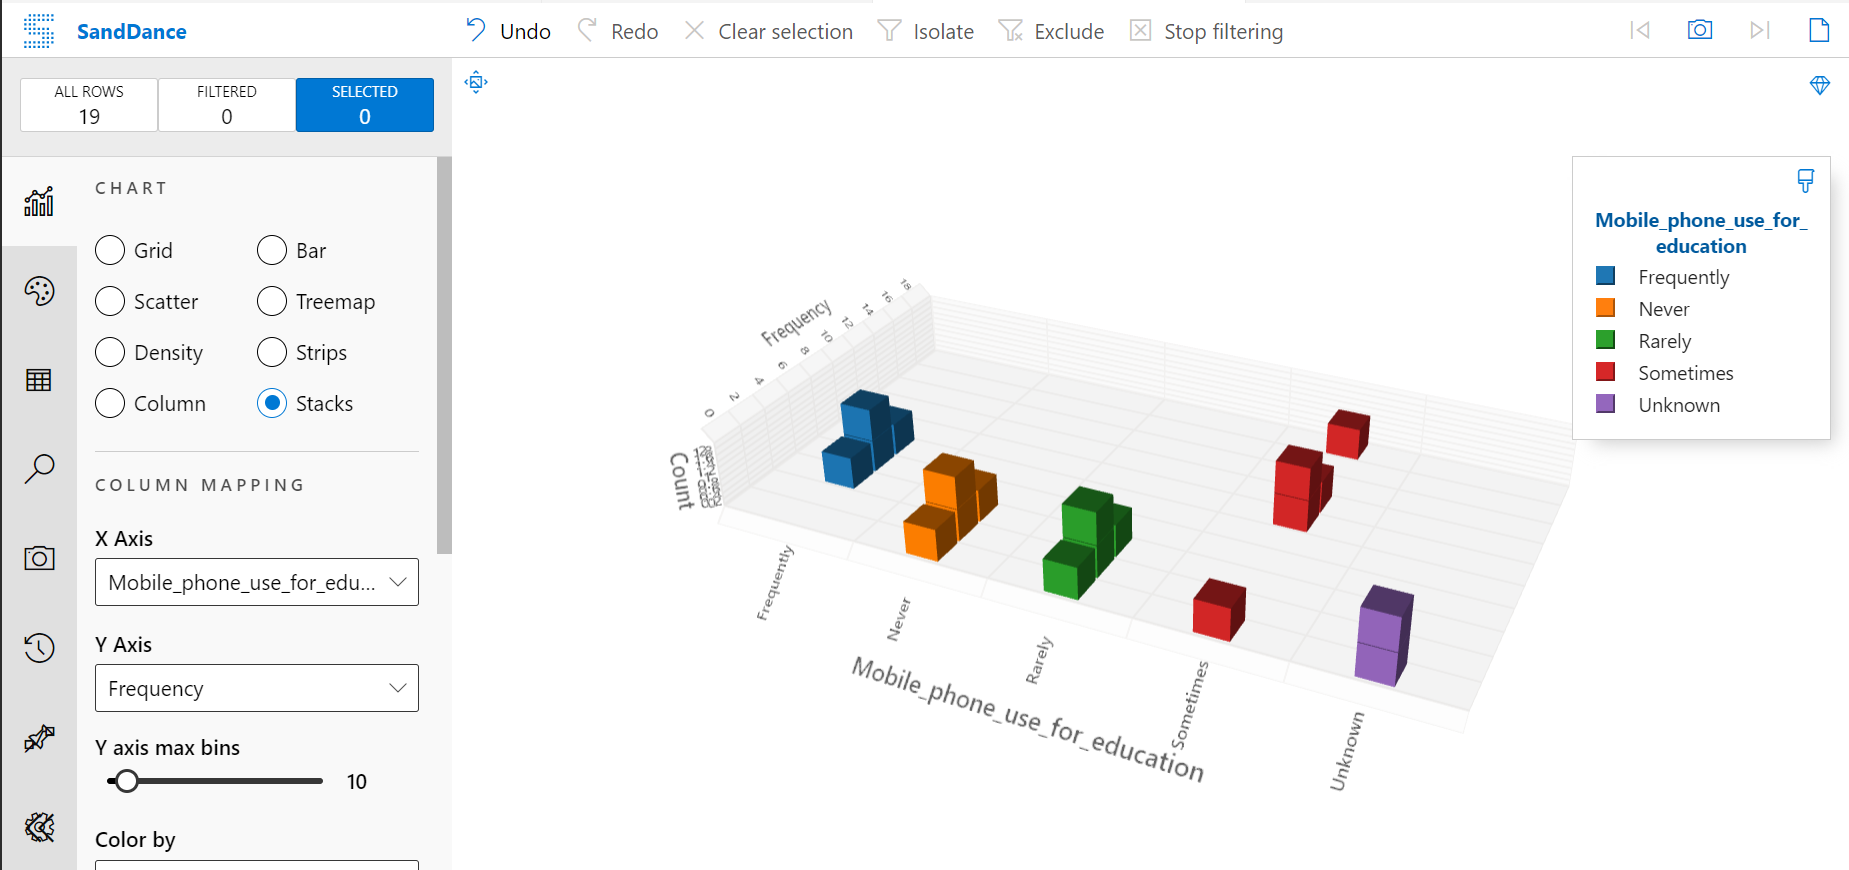

## 5.	Are students aware of potential health risks, and are they taking any health precautions?


### This study looks into whether students take preventative measures to lessen the health concerns that could arise from using a mobile phone for extended periods of time, such as eye strain and posture issues.

### Assessing awareness and health practices provides insights into students' proactive measures to maintain their well-being in the digital age.

### <u>In this case, the study reveals there is a level of awareness among students regarding health risks associated with mobile phone usage. While some students take proactive health precautions, such as using blue light filters or taking breaks, the majority of students limit their screen time. However, it is best to note that others may benefit from increased education on managing digital health.</u>

### More resources and knowledge about digital health management need to be made available by educational institutions. Workshops, seminars, and educational efforts should be held to increase public understanding of the different health dangers connected to using a cell phone and the practical ways to reduce these risks.

In [1]:
SELECT 
    Health_Precautions,
    COUNT(*) AS TotalStudents
FROM StudentsHealth.dbo.Impact_of_Mobile_Phone_on_Students_Health
WHERE 
    Health_Risks = 1 AND Health_Precautions IS NOT NULL
GROUP BY 
    Health_Precautions
ORDER BY 
    TotalStudents DESC;

(4 rows affected)

Total execution time: 00:00:00.014

Health_Precautions,TotalStudents
Limiting Screen Time,22
Taking Break during prolonged use,13
Using Blue light filter,12
None of Above,10
